# **APP RATING PREDICTION USING LINEAR REGRESSION**



In [ ]:
Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. loading dataset..

In [2]:
df=pd.read_csv('googleplaystore.csv')

2. First we need to check for null values in the data and get the number of null values for each column.

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

3. Dropping records with nulls in any of the columns. 



In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


4. Variables seem to have incorrect type and inconsistent formatting. we need to fix them: 

    a. Size column has sizes in Kb as well as Mb. To analyze, let's convert these to numeric.

    Extracting the numeric value from the column.

    Multiplying the value by 1,000, if size is mentioned in Mb

In [7]:
df["Size"].unique();

In [8]:
# replace m with blank and * by 1000
df.iloc[:,4]=df.iloc[:,4].apply(lambda x:float(str(x).replace('M', ""))*1000 if "M" in str(x) else x)

In [9]:
df['Size']=df['Size'].apply(lambda x:float(str(x).replace('k', "")) if "k" in str(x) else x)

In [114]:
df['Size'];

In [11]:
df['Size']=df['Size'].apply(lambda x:float(str(x).replace('Varies with device', "nan")) if "Varies with device" in str(x) else x)

In [12]:
df.dropna(inplace=True)

In [13]:
df['Size'].unique();

In [113]:
df['Size'];

4.b Reviews is a numeric field that is loaded as a string field. Converting it to numeric (int/float).

In [15]:
df['Reviews']=df['Reviews'].astype('int')

In [16]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10833        44
10834         7
10836        38
10837         4
10840    398307
Name: Reviews, Length: 7723, dtype: int32

In [17]:
df['Reviews']=df['Reviews'].apply(lambda x:int(x))

In [18]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10833        44
10834         7
10836        38
10837         4
10840    398307
Name: Reviews, Length: 7723, dtype: int64

4.c. Installs field is currently stored as string and has values like 1,000,000+. 

    Treated 1,000,000+ as 1,000,000

    removed ‘+’, ‘,’ from the field, converted it to integer

In [19]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7723, dtype: object

In [20]:
df['Installs']=df['Installs'].apply(lambda x:int(x.replace('+', "").replace(",","")))

In [21]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [1]:
#4.d Price field is a string and has $ symbol. Removed ‘$’ sign, and converted it to numeric.

In [22]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7723, dtype: object

In [23]:
df['Price']=df['Price'].apply(lambda x: float(x.replace("$", "")))

In [115]:
df['Price'];

5. Sanity checks:

    1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Dropped the rows that have a value outside this range.

    2. Reviews should not be more than installs as only those who installed can review the app. Found and dropped such records.

    3. For free apps (type = “Free”), the price should not be >0. Dropped any such rows.

In [25]:
df['Rating'].describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [26]:
df[(df['Rating']<1) | (df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Reviews should not be more than installs as only those who installed can review the app. If there are any such records, dropped them.

For free apps (type = “Free”), the price should not be >0. Dropped any such rows.

In [27]:
df[df['Reviews'] > df['Installs']].index

Int64Index([2454, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [28]:
df=df.drop(df[df['Reviews'] > df['Installs']].index)

In [29]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [112]:
df.reset_index(inplace=True, drop=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
3,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


5. For free apps (type = “Free”), the price should not be >0. Dropped any such rows.

In [31]:
df[(df['Type']=="Free") & (df['Price'] > 0)] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**as you can see there are no records with above condition nothing needs to be dropped**

5. Performing univariate analysis: 

     Boxplot for Price

     Checked for any outliers..lets think about the price of usual apps on Play Store.

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

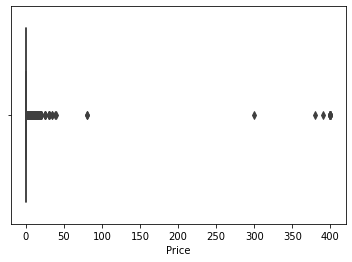

In [32]:
sns.boxplot(df['Price'])

In [33]:
df['Price'].quantile([0.1,0.25,0.5,0.75,0.9])

0.10    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.90    0.0
Name: Price, dtype: float64

In [34]:
df['Price'].max()

400.0

all quartiles are 0 for price attribute hence,no boxplot appears above

(0.0, 100.0)

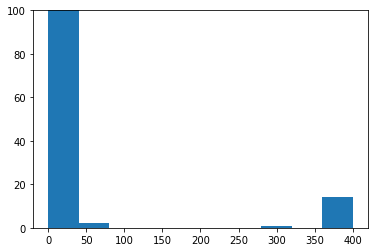

In [35]:
plt.hist("Price", data=df)
plt.ylim([0,100])
#changed the y limit to see the outliers and to visualize the boxplot better

As you can see the outliers lie between 70-80


Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

(0.0, 100000.0)

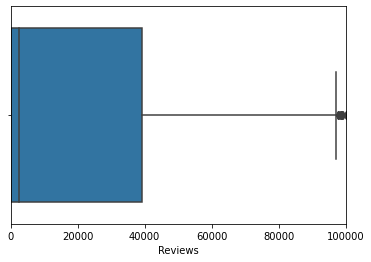

In [36]:
sns.boxplot(x="Reviews", data=df)
plt.xlim([0, 100000])

In [37]:
df['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

(0.0, 100.0)

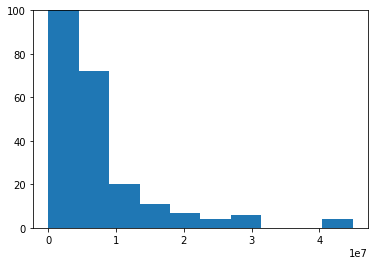

In [38]:
plt.hist(df['Reviews'])
plt.ylim([0, 100])

In [39]:
#which apps have very high reviews?
df[df['Reviews']>3e5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
124,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,4.1,363934,7100.0,10000000,Free,0.0,Everyone,Books & Reference,"July 11, 2018",9.1.363,4.1 and up
147,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30000.0,10000000,Free,0.0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
149,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
164,MyASUS - Service Center,BUSINESS,4.4,380837,7300.0,10000000,Free,0.0,Everyone,Business,"July 4, 2018",3.4.5,4.2 and up
216,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083,6300.0,10000000,Free,0.0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up
7651,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400.0,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
7677,Modern Strike Online,GAME,4.3,834117,44000.0,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
7699,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24000.0,1000000,Free,0.0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up


In [116]:
print("In our dataset, there are 3 apps that have no. of reviews more than 3 Lacs, apps are {}".format(df[df['Reviews']>3e5]['App']));

In our dataset, there are 3 apps that have no. of reviews more than 3 Lacs, apps are 3783            Grand Theft Auto: San Andreas
4549           Guardian Hunter: SuperBrawlRPG
5937    Castle Clash: RPG War and Strategy FR
Name: App, dtype: object


Do the values seem right?

In [41]:
df[(df['Reviews']>3e5) & (df['Installs']> df['Reviews'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
124,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,4.1,363934,7100.0,10000000,Free,0.0,Everyone,Books & Reference,"July 11, 2018",9.1.363,4.1 and up
147,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30000.0,10000000,Free,0.0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
149,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
164,MyASUS - Service Center,BUSINESS,4.4,380837,7300.0,10000000,Free,0.0,Everyone,Business,"July 4, 2018",3.4.5,4.2 and up
216,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083,6300.0,10000000,Free,0.0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up
7651,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400.0,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
7677,Modern Strike Online,GAME,4.3,834117,44000.0,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
7699,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24000.0,1000000,Free,0.0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up


Yes the values seem right as the no. of installs for these apps are higher than no. Reviews.

In [42]:
df.reset_index(inplace=True, drop=True)
df;

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Text(0.5, 1.0, 'Boxplot for Ratings')

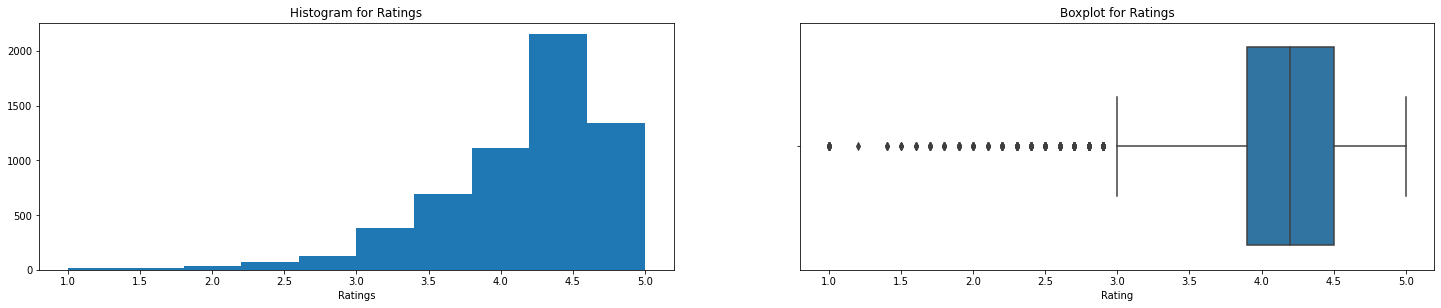

In [111]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.hist(x="Rating", data=df)
plt.title('Histogram for Ratings')
plt.xlabel('Ratings')
plt.subplot(2,2,2)
sns.boxplot(x="Rating", data=df)
plt.title('Boxplot for Ratings')
# plt.subplot(2,2,3)
# sns.countplot(x="Rating", data=df)

In [44]:
df['Rating'].describe()

count    7717.000000
mean        4.173293
std         0.544362
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

**As we observe from the above plots, the plots are right-skewed and hence, ratings are more towards the higher side.**

-Histogram for Size

In [45]:
df['Size'].describe()

count      7717.000000
mean      22976.614293
std       23456.770600
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

(0.0, 900.0)

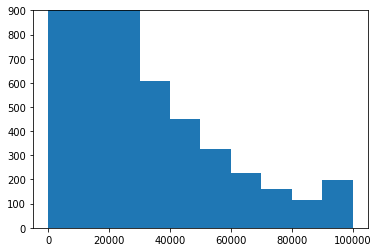

In [46]:
plt.hist(x="Size", data=df)
plt.ylim([0,900])

<AxesSubplot:xlabel='Size'>

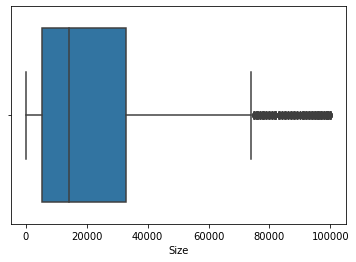

In [47]:
sns.boxplot(x="Size", data=df)

6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious! Lets Check out the records with very high price.

Is 200 indeed a high price?

Dropped these as most seem to be junk apps

In [48]:
df=df.drop(df[df['Price']>200].index)

In [49]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [50]:
df=df.drop(df[df['Reviews']>2e6].index)

In [51]:
df[df['Reviews']>2e6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [52]:
df['Installs'].quantile([0.1,0.25,0.5,.7,.9,.95,.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

Decide a threshold as cutoff for outlier and drop records having values more than that

In [53]:
df=df.drop(df[df['Installs']>2e6].index)

We used sns.countplot, sns.boxplot, plt.hist for univariate analysis as done above. We found outliers using this analysis and dropped them as they will not help in analysis and will only skew the data.

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1. - Make scatter plot/joinplot for Rating vs. Price

    

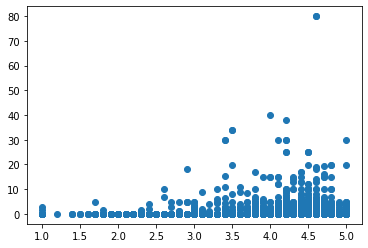

In [54]:
plt.scatter(df["Rating"], df["Price"])

**Rating does not increase with price. We have higher ratings for apps having price<=40**

In [55]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.134468,0.028404,0.079238,0.034180
Reviews,0.134468,1.000000,0.172652,0.579802,-0.031237
Size,0.028404,0.172652,1.000000,0.206521,0.028241
Installs,0.079238,0.579802,0.206521,1.000000,-0.105701
Price,0.034180,-0.031237,0.028241,-0.105701,1.000000


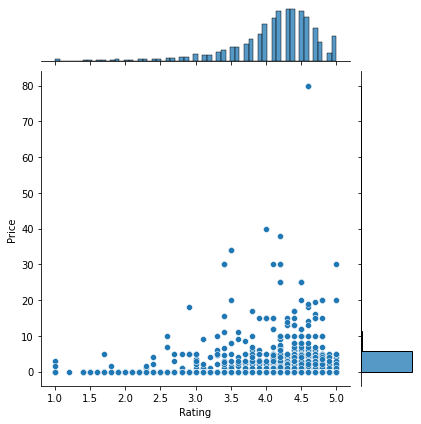

In [56]:
sns.jointplot(x="Rating", y="Price", data=df)

7. B. Make scatter plot/joinplot for Rating vs. Size

      Are heavier apps rated better?

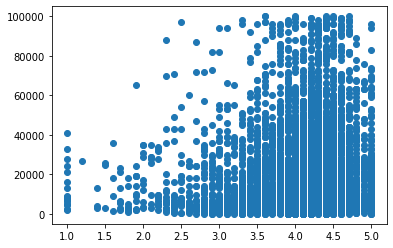

In [57]:
plt.scatter(df["Rating"], df["Size"])

In [121]:
df.groupby(['Rating', 'Size']).Rating.count().sort_values(ascending=False);

**As we can observe from the plots above, the heavier apps are not rated better**

Make scatter plot/joinplot for Rating vs. Reviews

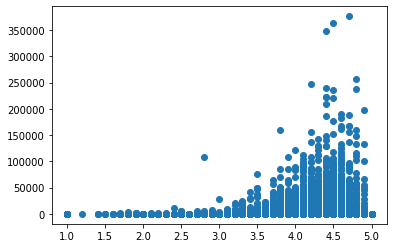

In [59]:
plt.scatter(df['Rating'], df['Reviews'])

**Apps having more reviews are having better ratings.**

Make boxplot for Rating vs. Content Rating


Lets check if there is there any difference in the ratings? Are some types liked better?

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

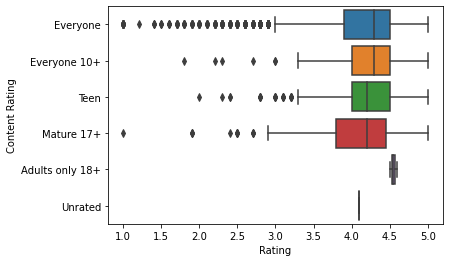

In [60]:
sns.boxplot(x="Rating", y="Content Rating", data=df)

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

In [61]:
df['Category'].nunique()

33

In [62]:
# how to find top 10 categories by mean Rating?
x=df.groupby('Category').Rating.mean().sort_values(ascending=False).head(10).reset_index()
x

,Category,Rating
0,EVENTS,4.491892
1,ART_AND_DESIGN,4.367308
2,EDUCATION,4.360759
3,PARENTING,4.339535
4,BOOKS_AND_REFERENCE,4.321538
5,PERSONALIZATION,4.318860
6,BEAUTY,4.286111
7,SOCIAL,4.243548
8,WEATHER,4.234146
9,LIBRARIES_AND_DEMO,4.229091


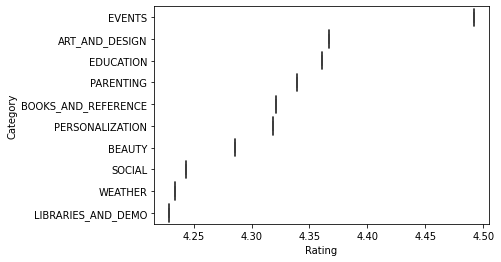

In [120]:
sns.boxplot(x="Rating", y="Category", data=x);

In [119]:
y=df.groupby('Genres').Rating.mean().sort_values(ascending=False).head(10).reset_index()
y;

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


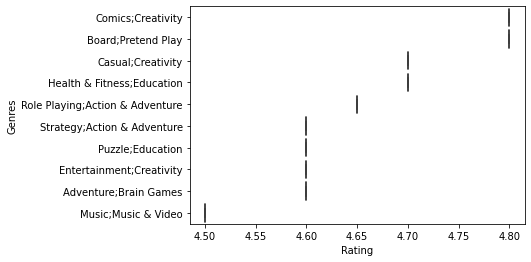

In [118]:
sns.boxplot(y['Rating'], y['Genres']);;

In [117]:
df.columns;

<AxesSubplot:xlabel='Rating', ylabel='Category'>

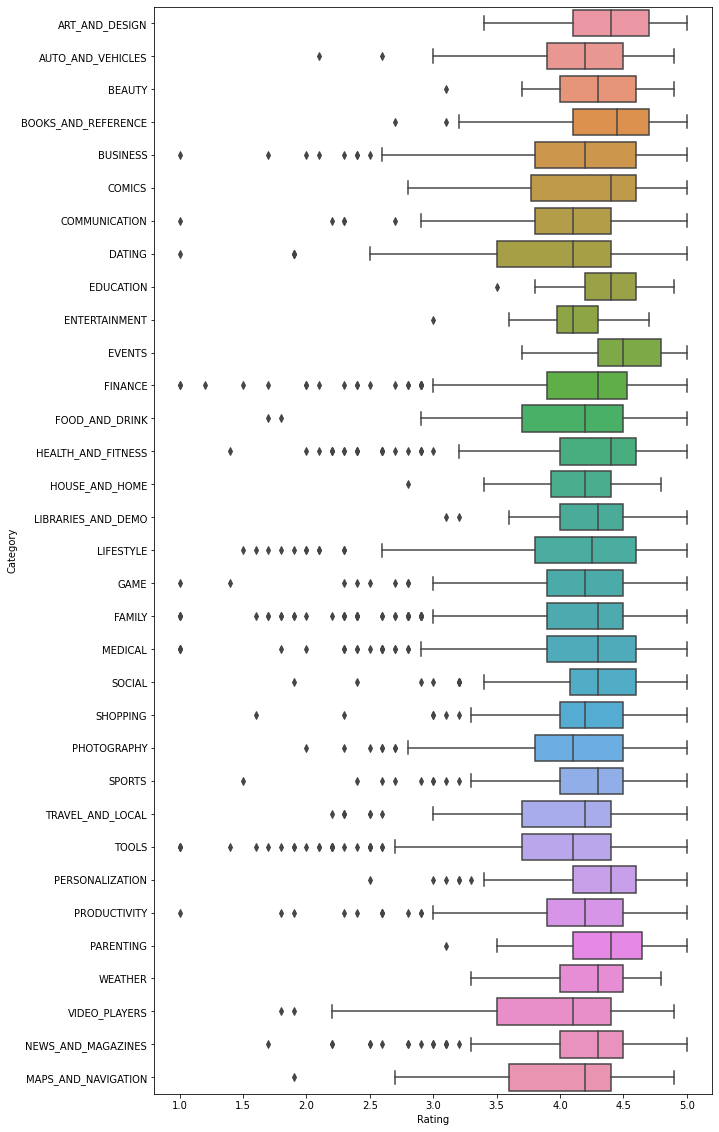

In [109]:
plt.figure(figsize=(10,20))
sns.boxplot(x="Rating", y="Category", data=df)

In [68]:
df.shape

(5954, 13)

8. **Data preprocessing**

  a.Created a copy of the dataframe to make all the edits. Named it to inp1.

  **Reviews and Install have some values that are still relatively very high. Before building a linear regression model, we need   to reduce the skew. Applied log transformation (np.log1p) to Reviews and Installs.**

In [69]:
inp1=df.copy()

In [70]:
df.shape

(5954, 13)

In [71]:
inp1['Reviews']=np.log1p(inp1['Reviews'])
inp1.shape

(5954, 13)

In [72]:
inp1['Installs']=np.log1p(inp1['Installs'])
inp1.shape

(5954, 13)

In [73]:
inp1['Installs']

0        9.210440
1       13.122365
4       11.512935
5       10.819798
6       10.819798
          ...    
7711    11.512935
7712     6.908755
7713     6.216606
7714     8.517393
7715     4.615121
Name: Installs, Length: 5954, dtype: float64

b. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [74]:
inp1=inp1.drop(['App','Last Updated', 'Current Ver', 'Android Ver'],axis=1)

In [75]:
inp1.shape

(5954, 9)

**C. Created dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe is inp2.**

Get dummy columns for Category

In [76]:
df_category=pd.get_dummies(inp1['Category'], drop_first=True)

In [77]:
df_category.shape

(5954, 32)

In [78]:
inp1['Category'].nunique()

33

Get dummy columns for Genres

In [79]:
df_genres=pd.get_dummies(inp1['Genres'], drop_first=True)
df_genres.shape

(5954, 105)

In [80]:
inp1['Genres'].nunique()

106

Get dummy columns for Content Rating

In [81]:
df_CR=pd.get_dummies(inp1['Content Rating'], drop_first=True)
df_CR.shape

(5954, 5)

In [82]:
inp2 = pd.merge(
    left=inp1,
    right=df_category,
    left_index=True,
    right_index=True,
)

In [83]:
inp2.shape

(5954, 41)

In [84]:
inp2 = pd.merge(
    left=inp2,
    right=df_genres,
    left_index=True,
    right_index=True,
)

In [85]:
inp2.shape

(5954, 146)

In [86]:
inp2 = pd.merge(
    left=inp2,
    right=df_CR,
    left_index=True,
    right_index=True,
)

In [87]:
inp2.shape

(5954, 151)

In [88]:
inp2=inp2.drop(['Category', 'Type', 'Genres', 'Content Rating'], axis=1)

9. Imported Train test split and applied 70-30 split. Named the new dataframes df_train and df_test.

In [89]:
import sklearn
from sklearn.model_selection import train_test_split

In [90]:
# df_train,df_test=train_test_split(inp2, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(inp2.drop(['Rating'],axis=1),
                                                    inp2['Rating'], test_size = 0.30)

In [91]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4167, 146) (4167,)
(1787, 146) (1787,)


11. Model building

    Used linear regression as the technique

    Reported the R2 on the train set

In [95]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [96]:
lm.fit(X_train, y_train)

LinearRegression()

In [97]:
y_predicted_train=lm.predict(X_train)
y_predicted_train

array([3.58476906, 4.48613589, 4.15138046, ..., 4.20434833, 4.52213581,
       4.06918689])

In [98]:
# r-squared : gives goodness of fit 
lm.score(X_train, y_train)

0.15050168931442265


12. Make predictions on test set and report R2.

In [99]:
y_predicted_test=lm.predict(X_test)

In [100]:
lm.score(X_test, y_test)

0.0776541366213167

In [101]:
# RMSE : Root mean Squared Error 
from sklearn.metrics import mean_squared_error as mse

In [4]:
# Built a dataframe with both actual and predicted values of test dataset

In [5]:
y_predicted_test=pd.DataFrame(y_predicted_test);

NameError: name 'pd' is not defined

In [107]:
print('Root Mean Square Error for train dataset',mse(y_true=y_train,y_pred=y_predicted_train,squared=False))
print('Root Mean Square Error for test dataset',mse(y_true=y_test,y_pred=y_predicted_test,squared=False))

Root Mean Square Error for train dataset 0.5555845789913566
Root Mean Square Error for test dataset 0.550780653248092
